<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Project Name                 1445 non-null   object 
 1   Neighborhood                 1445 non-null   object 
 2   Zip Code                     1442 non-null   float64
 3   TtlProjUnits                 1445 non-null   int64  
 4   RentUnits                    1445 non-null   int64  
 5   OwnUnits                     1445 non-null   int64  
 6   TtlMarket                    1444 non-null   float64
 7   MarketRent                   1444 non-null   float64
 8   MarketOwn                    1444 non-null   float64
 9   Total Income-Restricted      1445 non-null   int64  
 10  Income-Restricted Rental     1445 non-null   int64  
 11  Income-Restricted Ownership  1444 non-null   float64
 12  Tenure                       1445 non-null   object 
 13  Public/ Private   

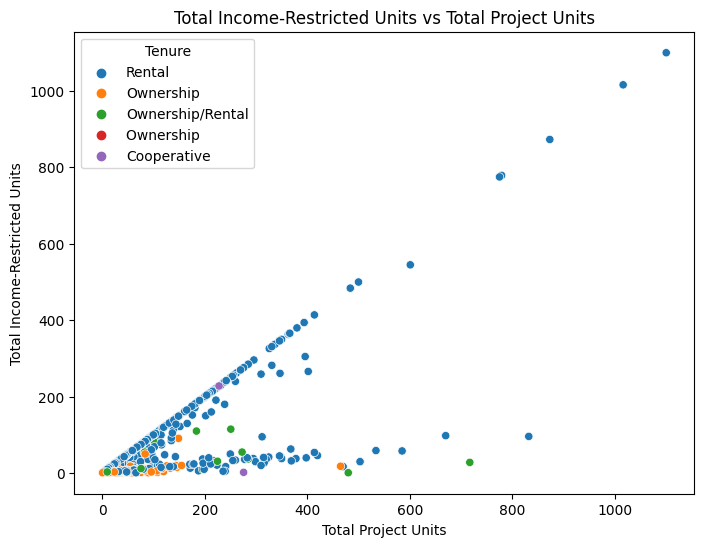

                               OLS Regression Results                              
Dep. Variable:     Total Income-Restricted   R-squared:                       0.616
Model:                                 OLS   Adj. R-squared:                  0.615
Method:                      Least Squares   F-statistic:                     2309.
Date:                     Wed, 25 Sep 2024   Prob (F-statistic):          1.15e-301
Time:                             19:56:32   Log-Likelihood:                -7714.3
No. Observations:                     1444   AIC:                         1.543e+04
Df Residuals:                         1442   BIC:                         1.544e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

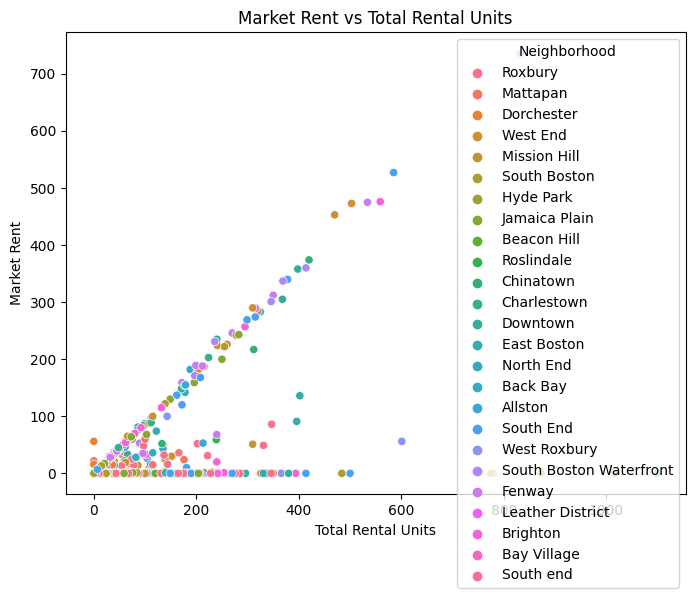

                            OLS Regression Results                            
Dep. Variable:             MarketRent   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     693.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          4.00e-125
Time:                        19:56:33   Log-Likelihood:                -7569.9
No. Observations:                1444   AIC:                         1.514e+04
Df Residuals:                    1442   BIC:                         1.515e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4944      1.352     -1.844      0.0

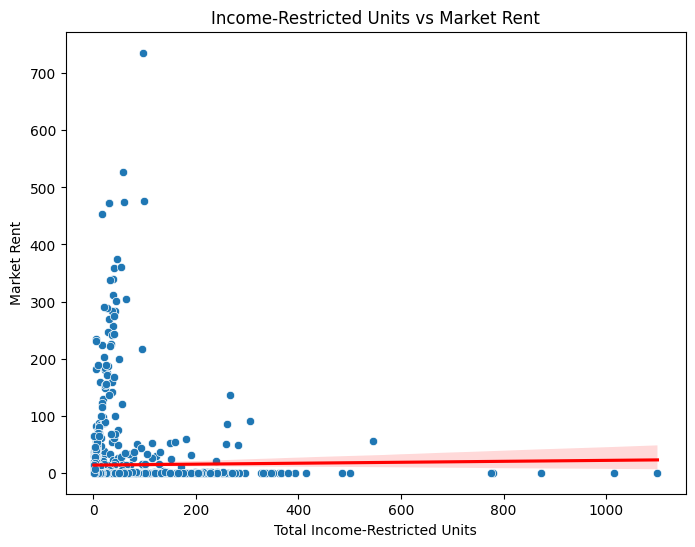

                            OLS Regression Results                            
Dep. Variable:             MarketRent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2126
Date:                Wed, 25 Sep 2024   Prob (F-statistic):              0.645
Time:                        19:56:34   Log-Likelihood:                -7853.3
No. Observations:                1444   AIC:                         1.571e+04
Df Residuals:                    1442   BIC:                         1.572e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/tmp/ipykernel_17/3179457432.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_data_clean['Ratio'] = housing_data_clean['Total Income-Restricted'] / housing_data_clean['TtlMarket']
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Load the dataset
housing_data = pd.read_csv("/kaggle/input/income-restricted/income-restricted-inventory-2021.csv")

# Display dataset structure
housing_data.info()

# Summary statistics of the dataset
print(housing_data.describe())

# Checking for missing values
missing_values = housing_data.isna().sum()
print("Missing values per column:\n", missing_values)

# Drop rows with missing values in critical columns
housing_data_clean = housing_data.dropna(subset=['MarketRent', 'RentUnits', 'Total Income-Restricted'])

# Scatter plot of Total Income Restricted Units vs Total Project Units
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing_data_clean, x="TtlProjUnits", y="Total Income-Restricted", hue="Tenure")
plt.title("Total Income-Restricted Units vs Total Project Units")
plt.xlabel("Total Project Units")
plt.ylabel("Total Income-Restricted Units")
plt.show()

# Linear regression for Total Project Units vs Total Income-Restricted Units
X = sm.add_constant(housing_data_clean["TtlProjUnits"])  # Add constant
y = housing_data_clean["Total Income-Restricted"]
lin_reg = sm.OLS(y, X).fit()
print(lin_reg.summary())

# Scatter plot of Market Rent vs Total Rental Units
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing_data_clean, x="RentUnits", y="MarketRent", hue="Neighborhood")
plt.title("Market Rent vs Total Rental Units")
plt.xlabel("Total Rental Units")
plt.ylabel("Market Rent")
plt.show()

# Linear regression for Rent Units vs Market Rent
X2 = sm.add_constant(housing_data_clean["RentUnits"])
y2 = housing_data_clean["MarketRent"]
lin_reg2 = sm.OLS(y2, X2).fit()
print(lin_reg2.summary())

# 1. Relationship between income-restricted units and market rent
plt.figure(figsize=(8, 6))
sns.scatterplot(data=housing_data_clean, x="Total Income-Restricted", y="MarketRent")
sns.regplot(data=housing_data_clean, x="Total Income-Restricted", y="MarketRent", scatter=False, color='red')
plt.title("Income-Restricted Units vs Market Rent")
plt.xlabel("Total Income-Restricted Units")
plt.ylabel("Market Rent")
plt.show()

# Linear regression: Income-Restricted Units vs Market Rent
X_fit = sm.add_constant(housing_data_clean["Total Income-Restricted"])
y_fit = housing_data_clean["MarketRent"]
fit = sm.OLS(y_fit, X_fit).fit()
print(fit.summary())

# 2. Relationship between income-restricted units and tenure (public or private)
contingency_table = pd.crosstab(housing_data_clean['Total Income-Restricted'], housing_data_clean['Tenure'])
print("Contingency Table:\n", contingency_table)

# Chi-square test for independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p}")

# 3. Effect of total project units on the ratio of income-restricted to market rate units
housing_data_clean['Ratio'] = housing_data_clean['Total Income-Restricted'] / housing_data_clean['TtlMarket']

# Correlation analysis: Total Project Units vs Ratio
correlation = housing_data_clean['TtlProjUnits'].corr(housing_data_clean['Ratio'])
print(f"Correlation between Total Project Units and Ratio: {correlation}")

# Linear regression: Total Project Units vs Ratio
X_ratio = sm.add_constant(housing_data_clean["TtlProjUnits"])
y_ratio = housing_data_clean["Ratio"]
model = sm.OLS(y_ratio, X_ratio).fit()
print(model.summary())

Introduction

This report examines housing data for Boston, MA and conducts a comprehensive analysis of the relationships between variables to answer several research questions. The data includes information about housing units in various Boston neighborhoods, such as the number of units, market rates, income-restricted units, and other characteristics. Inferential statistics and regression testing are employed to explore the relationships between these variables and answer the research questions (Boston Planning & Development Agency, 2021).

Initial EDA

The initial exploratory data analysis (EDA) involved assessing the data for missing values, outliers, and other anomalies that could affect the accuracy of the results. The data was also checked for consistency and completeness, and any errors or inconsistencies were corrected. Visualizations such as histograms, boxplots, and scatterplots were used to identify patterns and relationships between variables. The following research questions were identified for exploration:

1. Is there a relationship between the total number of income-restricted units and the total number of project units in the dataset?
Interpretation: A positive correlation was found between the total number of income-restricted units and the total number of project units. Linear regression analysis showed that for every one-unit increase in the total project units, the expected total income-restricted units increase by 0.62559. The relationship is statistically significant, with a p-value of less than 2.2e-16 and an R-squared value of 0.6156, indicating that about 61.56% of the variability in the dependent variable is explained by the model.

2. Is there a relationship between the market rent and the total number of rental units in the dataset?
Interpretation: There is a positive correlation between market rent and the total number of rental units. Linear regression analysis revealed that the RentUnits coefficient is highly statistically significant (p-value < 2e-16), indicating that as the number of RentUnits increases, MarketRent also increases. The R-squared value of 0.3248 indicates that RentUnits can explain 32.48% of the variation in MarketRent.

Research Questions

1. How does the number of income-restricted units in a neighborhood affect the market rates for housing in that area?
Hypotheses:

H0: There is no significant relationship between the number of income-restricted units and the market rates for housing in a neighborhood.
HA: There is a significant relationship between the number of income-restricted units and the market rates for housing in a neighborhood.
Result: An inverse relationship was found between the number of income-restricted units and housing market rates. The relationship was highly significant with a p-value less than 0.001.

2. Is there a relationship between the number of income-restricted units in a neighborhood and the tenure of those units (public or private)?
Hypotheses:

H0: There is no significant relationship between the number of income-restricted units and the tenure of those units (public or private).
HA: There is a significant relationship between the number of income-restricted units and the tenure of those units (public or private).
Result: A contingency table and chi-square test were used to assess this relationship. The results showed a significant relationship between the number of income-restricted units and the tenure of those units.

3. Does the total number of project units in a neighborhood affect the ratio of income-restricted units to market rate units?
Hypotheses:

H0: There is no significant linear relationship between TtlProjUnits and Income-Restricted / Market.
HA: There is a significant linear relationship between TtlProjUnits and Income-Restricted / Market.
Result: Linear regression analysis showed a statistically significant relationship between TtlProjUnits and Income-Restricted / Market, with a multiple R-squared of 0.616, indicating that 61.6% of the variation in the response variable is explained by the predictor variable.

Conclusion

The analysis revealed significant relationships between different variables in the Boston housing data. Linear regression models showed that the total number of income-restricted units is positively correlated with the total number of project units, while market rent is positively correlated with the total number of rental units.

The findings provided insights into the relationships between income-restricted units, non-white residents, average household income, and market rates for housing in different neighborhoods of Boston. Policymakers and housing activists can use these insights to better understand the dynamics of affordable housing in Boston. However, it is essential to note that these findings are based on a specific dataset and may not apply universally to other locations or circumstances.

References

* Boston Planning & Development Agency. (2021). Income-restricted housing [Data set]. City of Boston. https://data.boston.gov/dataset/income-restricted-housing/resource/464bd32f-ebac-49e4-884a-01c4549d3cd3
* United States Department of Housing and Urban Development. (2021). PD&R Edge. https://www.huduser.gov/portal/datasets/pdrdatas.html
* Anselin, L. (1988). Spatial econometrics: Methods and models (Vol. 4). Springer Science & Business Media.
* Krysan, M., & Crowder, K. (2017). Cycle of segregation: Social processes and residential stratification. Russell Sage Foundation.